In [12]:
import numpy as np
import pandas as pd

np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})

data = pd.read_csv("C:\\Users\\utkar\\Desktop\\Python\\CDS\\data\\income-vs-car.csv")
data

,Monthly income (thousand rupees),Cost of car (lakh rupees)
0,1.919129,17.725932
1,1.938647,10.438498
2,0.949342,6.919004
3,1.223274,9.033183
4,1.607333,16.087662
...,...,...
195,6.523899,53.416702
196,7.056191,50.476447
197,9.781305,72.901174
198,9.467640,81.857660


(200, 2)


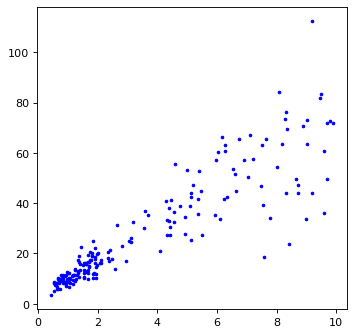

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

D = data.values

print(D.shape)

fig=plt.figure(figsize=(5, 5), dpi= 80, facecolor='w', edgecolor='k')
ax = plt.subplot(111)
ax.scatter(D[:,0], D[:,1], s=5, c='b')
#ax.scatter(X_test, Y_test, s=10, c='r')
plt.show()

In [4]:
n_train = 170
n_test = 30

X = D[0:n_train,0]
Y = D[0:n_train,1]

X_test = D[n_train:,0]
Y_test = D[n_train:,1]

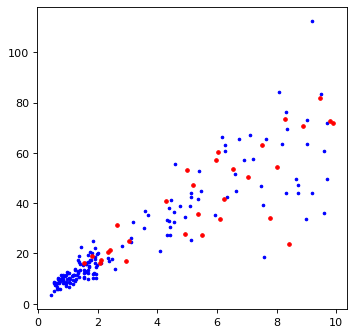

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

fig=plt.figure(figsize=(5, 5), dpi= 80, facecolor='w', edgecolor='k')
ax = plt.subplot(111)
ax.scatter(X, Y, s=5, c='b')
ax.scatter(X_test, Y_test, s=10, c='r')
plt.show()

## The model

Our model is $\hat{y} = wx + b$. The parameter $w$ is the weight, $b$ is the bias. For now, let us assume that $b$ is fixed. We only want to learn $w$. So, we should have $\hat{Y} = wX + b$, where $X$ is the vector of all input values of $x$. 

## The error (cost) we want to optimize

For each value of $x$, we have a true value of $y$ and a predicted value $\hat{y}$ according to our model. We want to minimize the mean squared error between $\hat{y}$ and $y$ for our training set. So, the cost function is

$J = \frac{1}{n}\sum (y - \hat{y})^2 = \frac{1}{n} \sum (y - wx - b)^2$.

We need to find the $w$ for which $J$ is minimized. The function $J$ is quadratic in $w$ and hence has a minima. 

## Gradient (derivative) of the cost function

We want to find $w$ for which $\frac{dJ}{dw} = \frac{1}{n} \sum - 2x (y - wx - b)$ is (almost) zero. We start with any value of $w$, and iteratively update $w$. 

In [6]:
def cost(X, Y, w, b):
    return sum((Y - w * X - b)**2)/len(X)

def gradient(X, Y, w, b):
    return -2 * sum(X * (Y - w * X - b))/len(X)

def train_lin_reg(X, Y, w_init, b, max_iteration, learning_rate):
    # Initialize w
    w = w_init
    
    # For our intuition, we also keep track of how the gradient and the costs changed
    ws = []
    costs = []

    for i in range(max_iteration):
        # for simplicity, we write dw instead of dj/dw
        dw = gradient(X, Y, w, b)
        #print(dw)
        #print(np.sign(dw))
        
        # We keep track of w, grad, cost
        ws.append(w)
        costs.append(cost(X,Y, w, b))
        
        
        # Change w by learning_rate towards the opposite direction of the gradient
        w = w - dw * learning_rate
    
    # Return w nevertheless after so many iterations
    return w, np.array(ws), np.array(costs)

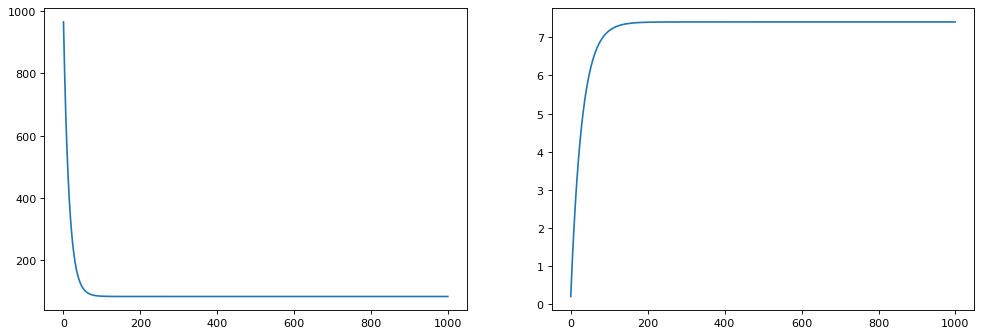

w =  7.402498268585498
cost =  84.35400267709802


In [7]:
w, ws, costs = train_lin_reg(X, Y, w_init = 0.2, b = 0, max_iteration = 1000, learning_rate = 0.001)



fig=plt.figure(figsize=(15, 5), dpi= 80, facecolor='w', edgecolor='k')
ax = plt.subplot(121)
plt.plot(np.arange(len(costs)), costs)
ax = plt.subplot(122)
plt.plot(np.arange(len(ws)), ws)
plt.show()

print("w = ", w)
print("cost = ", costs[len(costs)-1])

## Learned model

So let us see the regression line we have obtained. 

NameError: name 'b' is not defined

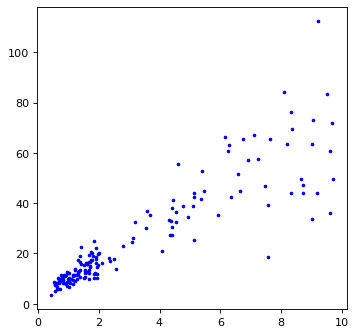

In [8]:
fig=plt.figure(figsize=(5, 5), dpi= 80, facecolor='w', edgecolor='k')
ax = plt.subplot(111)
ax.scatter(X, Y, s=5, c='b')
ax.plot(X, w*X + b, c='k')
# ax.scatter(X_test, Y_test, s=10, c='r')
plt.show()

# Optimizing both w and b

To optimize both $w$ and $b$, we need to take partial derivatives $\frac{\partial J}{\partial w}$ and $\frac{\partial J}{\partial b}$ and keep updating both to make both zero. 

$\frac{\partial J}{\partial w} = \frac{1}{n} \sum - 2x (y - wx - b)$, and 
$\frac{\partial J}{\partial b} = \frac{1}{n} \sum - 2 (y - wx - b)$.

So, we change our code a bit now. 

In [9]:
def gradient(X, Y, w, b):
    return -2 * sum(X * (Y - w * X - b))/len(X), -2 * sum(Y - w * X - b)/len(X)

def train_lin_reg(X, Y, w_init, b_init, max_iteration, learning_rate):
    # Initialize w
    w = w_init
    b = b_init
    
    # For our intuition, we also keep track of how the gradient and the costs changed
    ws = []
    bs = []
    costs = []

    for i in range(max_iteration):
        # for simplicity, we write dw instead of dj/dw
        dw, db = gradient(X, Y, w, b)
        #print(dw)
        #print(np.sign(dw))
        
        # We keep track of w, grad, cost
        ws.append(w)
        bs.append(b)
        costs.append(cost(X,Y, w, b))
        
        # Change w by learning_rate towards the opposite direction of the gradient
        w = w - dw * learning_rate
        b = b - db * learning_rate
    
    # Return w nevertheless after so many iterations
    return w, b, np.array(ws), np.array(bs), np.array(costs)

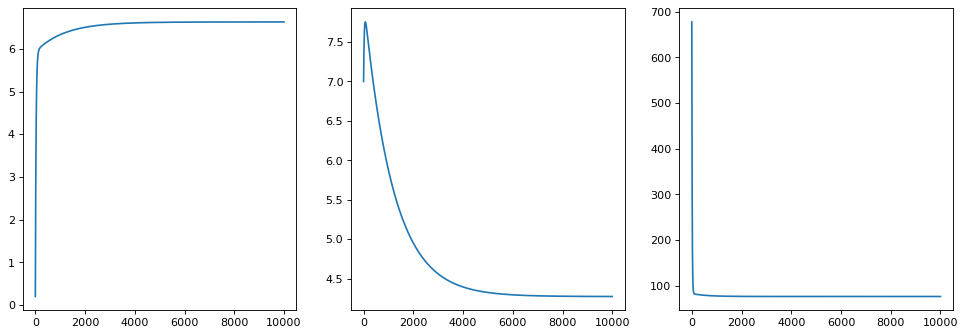

w =  6.629166456824929
b =  4.2744133162524
cost =  76.23745619282276


In [10]:
w, b, ws, bs, costs = train_lin_reg(X, Y, w_init = 0.2, b_init = 7, max_iteration = 10000, learning_rate = 0.001)



fig=plt.figure(figsize=(15, 5), dpi= 80, facecolor='w', edgecolor='k')
ax = plt.subplot(131)
plt.plot(np.arange(len(ws)), ws)
ax = plt.subplot(132)
plt.plot(np.arange(len(bs)), bs)
ax = plt.subplot(133)
plt.plot(np.arange(len(costs)), costs)
plt.show()

print("w = ", w)
print("b = ", b)
print("cost = ", costs[len(costs)-1])

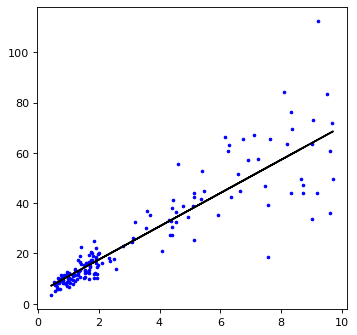

In [11]:
fig=plt.figure(figsize=(5, 5), dpi= 80, facecolor='w', edgecolor='k')
ax = plt.subplot(111)
ax.scatter(X, Y, s=5, c='b')
ax.plot(X, w*X + b, c='k')
# ax.scatter(X_test, Y_test, s=10, c='r')
plt.show()